In [1]:
import numpy as np
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, LeavePOut, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout, Activation, Flatten
from sklearn.metrics import (accuracy_score,confusion_matrix, ConfusionMatrixDisplay, r2_score, silhouette_score, 
balanced_accuracy_score,cohen_kappa_score, recall_score, precision_score, f1_score)
from kneed import knee_locator, KneeLocator
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Python Programs/EuroAstro/new_y1.csv")
df.head()

,Weekday,Date,Month,Year,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu,1st Num
0,Tuesday,4,1,2022,30,60,66,36,84,24,21,66,9,17,sixteentwenties
1,Friday,7,1,2022,30,80,100,54,22,24,80,66,9,17,onefives
2,Tuesday,11,1,2022,40,21,6,72,44,24,60,66,9,17,onefives
3,Friday,14,1,2022,11,42,5,72,44,24,60,66,9,17,sixtens
4,Tuesday,18,1,2022,22,63,32,19,44,48,40,66,9,17,onefives


In [3]:
encoding = LabelEncoder()
df["Weekday"] = encoding.fit_transform(df["Weekday"])
df["Year"] = encoding.fit_transform(df["Year"])
df["1st Num"] = encoding.fit_transform(df["1st Num"])

In [4]:
# 0 means Friday; 1 means Tuesday
# 0 means 2022; 1 means 2023; 2 means 2024
# 0 means elevenfifteens, 1 means onefives, 2 means sixteentwenties, 3 means sixtens, 4 means thirtyonefives,
# 5 means twentyonefives, 6 means twentysixthirties

df.head()

,Weekday,Date,Month,Year,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu,1st Num
0,1,4,1,0,30,60,66,36,84,24,21,66,9,17,2
1,0,7,1,0,30,80,100,54,22,24,80,66,9,17,1
2,1,11,1,0,40,21,6,72,44,24,60,66,9,17,1
3,0,14,1,0,11,42,5,72,44,24,60,66,9,17,3
4,1,18,1,0,22,63,32,19,44,48,40,66,9,17,1


In [5]:
X = df.iloc[:,0:14]
y = df.iloc[:,14:15]

In [6]:
X.head()

,Weekday,Date,Month,Year,Lagna,Sun,Moon,Mars,Mercury,Jupiter,Venus,Saturn,Rahu,Ketu
0,1,4,1,0,30,60,66,36,84,24,21,66,9,17
1,0,7,1,0,30,80,100,54,22,24,80,66,9,17
2,1,11,1,0,40,21,6,72,44,24,60,66,9,17
3,0,14,1,0,11,42,5,72,44,24,60,66,9,17
4,1,18,1,0,22,63,32,19,44,48,40,66,9,17


In [7]:
y.head()

,1st Num
0,2
1,1
2,1
3,3
4,1


In [8]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.996262,-1.327658,-1.473952,-1.089808,-0.188700,0.912933,1.253579,0.111163,1.844915,-0.288489,-0.473017,0.734723,-0.414686,-1.267311
1,-1.003752,-0.984940,-1.473952,-1.089808,-0.188700,1.634309,2.584572,0.751749,-0.392173,-0.288489,1.759288,0.734723,-0.414686,-1.267311
2,0.996262,-0.527982,-1.473952,-1.089808,0.265200,-0.493751,-1.095232,1.392335,0.401633,-0.288489,1.002574,0.734723,-0.414686,-1.267311
3,-1.003752,-0.185265,-1.473952,-1.089808,-1.051112,0.263694,-1.134379,1.392335,0.401633,-0.288489,1.002574,0.734723,-0.414686,-1.267311
4,0.996262,0.271693,-1.473952,-1.089808,-0.551821,1.021139,-0.077414,-0.493835,0.401633,0.380823,0.245861,0.734723,-0.414686,-1.267311


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200, 14), (200, 1), (67, 14), (67, 1))

In [10]:
covariance_matrix = np.cov([X_train.iloc[:,0], X_train.iloc[:,1], X_train.iloc[:,2], X_train.iloc[:,3],
                          X_train.iloc[:,4], X_train.iloc[:,5], X_train.iloc[:,6], X_train.iloc[:,7],
                          X_train.iloc[:,8], X_train.iloc[:,9], X_train.iloc[:,10], X_train.iloc[:,11],
                           X_train.iloc[:,12], X_train.iloc[:,13]])
print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
 [[ 1.00252663e+00 -2.07813691e-02  5.29161273e-02  1.74543623e-02
   9.53426240e-03 -5.71758099e-02 -2.94488672e-02  5.09682576e-03
  -7.74228702e-03 -2.44196835e-02 -6.88937150e-02 -2.54186728e-02
   2.03350805e-02  2.93290592e-02]
 [-2.07813691e-02  9.84182210e-01  1.29097894e-03 -2.37318925e-02
   8.73042936e-02 -7.66404485e-02  2.47022255e-03  2.58765862e-02
  -6.24197860e-02  3.47711968e-02 -3.56589284e-02 -1.02066032e-02
  -4.34709599e-02 -1.68355537e-03]
 [ 5.29161273e-02  1.29097894e-03  1.00992063e+00 -2.70415706e-01
  -1.37953028e-01 -1.60233606e-01 -9.97121679e-04 -2.43493062e-01
  -1.10148844e-01 -2.27872797e-01 -2.58894516e-01 -3.35964184e-01
   1.09205468e-01  9.42259709e-02]
 [ 1.74543623e-02 -2.37318925e-02 -2.70415706e-01  9.97589693e-01
   1.15578690e-02 -3.87032971e-02 -1.55710149e-02  8.73262061e-02
   4.06175725e-02 -6.00772069e-01 -2.92927805e-02  1.33374148e-01
   5.28136840e-01 -1.84773740e-01]
 [ 9.53426240e-03  8.73042936e-02 -1.37953028e-0

In [11]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [12]:
eigen_values

array([2.29737533, 1.93960858, 1.58673493, 0.13169211, 0.39348982,
       1.17417897, 0.4987287 , 0.62082849, 1.04216791, 0.99451762,
       0.93748811, 0.8795275 , 0.73200207, 0.72813085])

In [13]:
eigen_vectors

array([[ 9.45339861e-03, -9.25312577e-02,  4.55626319e-02,
         2.07958783e-04, -4.96187085e-02, -2.55314526e-01,
        -8.22546399e-02, -7.72216560e-02, -3.87338219e-01,
         7.29609786e-01,  4.72971249e-01,  4.31891443e-02,
        -2.94621263e-02,  9.98060855e-03],
       [ 6.86039572e-02, -4.15224513e-02, -1.47591989e-01,
         6.81720887e-03, -1.38588712e-02, -2.08017318e-01,
        -4.72956124e-02, -5.64335977e-02,  3.43156177e-01,
        -4.05568365e-01,  7.78914910e-01,  1.03495441e-01,
         1.45906390e-01,  4.36387038e-02],
       [ 1.66142374e-01, -3.50668065e-01,  4.87275864e-01,
        -4.96505386e-01, -5.64040399e-02, -2.00924071e-01,
         6.86687568e-02,  7.36652656e-03,  1.77332367e-01,
        -5.63806827e-03, -9.89553714e-02,  1.78743185e-01,
        -1.04165953e-01,  4.82784941e-01],
       [-4.94498232e-01, -2.52762490e-01, -1.61421795e-01,
        -5.94133405e-01,  2.34370189e-01,  4.12514541e-03,
        -1.19500351e-01, -2.88486449e-02, -3.

In [14]:
eigen_vectors.shape

(14, 14)

In [15]:
for i in eigen_vectors:
    sum = np.sum(i)
    print(sum)

0.33723364382543236
0.5702445825811775
0.2550530590434999
-1.706756946263338
-0.7851681369925921
0.7316776743291948
1.4545633911644398
-0.47148413648485005
0.9601053902686636
1.4082795975976479
-1.3779840668949195
0.7513656536864388
0.9484743496527963
0.9083403905434524


In [16]:
pc = eigen_vectors[[6,9]]
pc

array([[ 0.00405161,  0.07298615, -0.01616979,  0.02679107, -0.06377819,
         0.16904431, -0.01492958, -0.02058467,  0.80254603,  0.53083308,
        -0.05263698, -0.03843182,  0.14736224, -0.09252005],
       [ 0.42310457,  0.35011949, -0.14217722, -0.37941321,  0.60882044,
         0.28947181,  0.05375168,  0.08641899, -0.04088531,  0.08303801,
         0.13494641,  0.1067999 , -0.17640424,  0.01068827]])

In [17]:
pc.shape

(2, 14)

In [18]:
trans_X_train = np.dot(X_train.iloc[:,0:14], pc.T)
trans_X_train

array([[-0.10636515,  1.78806704],
       [ 0.43820577,  2.33852353],
       [-1.58107934, -0.38674072],
       [-0.13456075,  0.30609703],
       [-1.32136159,  0.00686356],
       [-0.32313302, -0.22256977],
       [-0.94908666, -0.95606238],
       [ 1.66642781, -0.65494487],
       [ 0.7080394 ,  1.28638694],
       [ 0.23378655,  0.92690487],
       [-1.58042686,  1.64494461],
       [ 0.60780457, -0.85120701],
       [-0.30887329, -0.79005769],
       [ 1.19232799, -0.46103021],
       [-0.0082293 ,  1.1726945 ],
       [-0.12912416, -0.09822969],
       [-0.93071973,  1.25247508],
       [ 0.69600312, -0.69059517],
       [ 0.37240142,  0.83955465],
       [ 0.92247576,  0.32632116],
       [ 0.11773368,  3.16464691],
       [ 0.10375803,  0.13783873],
       [ 0.04753712,  0.54846204],
       [-1.3966087 , -1.21553971],
       [-1.12038595,  0.10342186],
       [-0.2157136 ,  1.96650168],
       [-1.4471493 ,  0.47165511],
       [ 0.52701314,  1.50820137],
       [ 1.07709545,

In [19]:
new_X_train = pd.DataFrame(trans_X_train, columns = ['PC1','PC2'])
new_X_train

,PC1,PC2
0,-0.106365,1.788067
1,0.438206,2.338524
2,-1.581079,-0.386741
3,-0.134561,0.306097
4,-1.321362,0.006864
...,...,...
195,-1.553061,-0.574271
196,1.474708,0.583759
197,1.917674,0.112778
198,2.770743,-0.342269


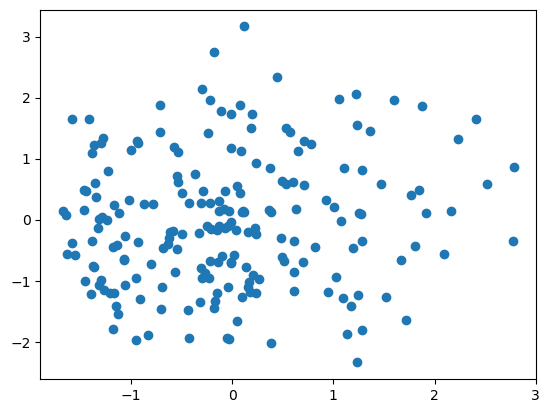

In [20]:
plt.scatter("PC1","PC2",data = new_X_train)
plt.show()

In [21]:
trans_X_test = np.dot(X_test.iloc[:,0:14], pc.T)
trans_X_test

array([[-0.33120175, -0.04905588],
       [-0.18599075,  0.04842945],
       [ 0.27274345,  1.13957717],
       [ 1.41357309, -0.41059904],
       [-0.53538974,  0.56729248],
       [-1.22372748,  0.62280382],
       [ 0.12840509, -0.15483175],
       [ 0.43254331,  1.35295091],
       [-1.43566419, -2.09878671],
       [-0.80076887,  0.08814702],
       [ 0.14976277, -0.78255387],
       [ 0.79034248, -1.5859419 ],
       [ 0.4099864 , -0.27072483],
       [-0.21671302,  0.9320958 ],
       [ 0.62402022, -0.53312414],
       [-0.92288666, -0.47202413],
       [-0.89914138, -0.60349047],
       [ 0.94792486, -0.00317897],
       [-0.97245067,  0.10660691],
       [ 0.15372744,  1.03530064],
       [ 0.95546434,  0.0022701 ],
       [-0.21233621,  0.83616198],
       [-1.47236284, -0.22948128],
       [-0.32403911, -0.0092132 ],
       [ 0.71093707,  1.34733141],
       [ 0.53497446,  0.65274325],
       [-1.44558074, -0.75457672],
       [ 2.01900369,  0.28284244],
       [-0.27205373,

In [22]:
new_X_test = pd.DataFrame(trans_X_test, columns = ['PC1','PC2'])
new_X_test.head()

,PC1,PC2
0,-0.331202,-0.049056
1,-0.185991,0.048429
2,0.272743,1.139577
3,1.413573,-0.410599
4,-0.535390,0.567292


In [23]:
model = LogisticRegression()
model.fit(new_X_train, y_train)

LogisticRegression()

In [24]:
model.score(new_X_test, y_test)

0.43283582089552236

In [25]:
w, b = model.coef_, model.intercept_
w, b

(array([[-0.40821542,  0.00928623],
        [-0.24493941,  0.15217443],
        [-0.22552518,  0.40909679],
        [-0.1730708 ,  0.29882711],
        [ 0.8106333 , -0.77006291],
        [ 0.28922606,  0.1625467 ],
        [-0.04810855, -0.26186834]]),
 array([ 1.00156082,  1.61654334,  0.6040664 ,  1.46987953, -3.45249546,
        -0.17313698, -1.06641766]))

In [32]:
model_dt=DecisionTreeClassifier(criterion="entropy")
model_dt.fit(new_X_train, y_train)
model_dt.score(new_X_test, y_test)

0.4925373134328358

In [34]:
model_dt.get_depth(), model_dt.get_n_leaves()

(17, 122)

In [35]:
y_predict_dt = model_dt.predict(new_X_test)
y_predict_dt

array([3, 3, 1, 6, 2, 0, 3, 3, 0, 3, 1, 3, 0, 1, 3, 3, 3, 3, 3, 1, 3, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 0, 0, 1, 1, 1, 2, 1, 5, 1, 5,
       2, 1, 1, 1, 0, 3, 6, 3, 0, 6, 3, 3, 0, 0, 3, 3, 1, 2, 0, 1, 1, 1,
       0])

In [36]:
y_test.values.T

array([[3, 3, 3, 3, 1, 1, 1, 0, 0, 1, 1, 3, 5, 3, 3, 3, 3, 5, 3, 3, 1, 2,
        2, 1, 5, 1, 1, 2, 1, 1, 3, 0, 1, 1, 2, 5, 2, 1, 1, 1, 1, 3, 0, 5,
        2, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 1, 3, 0, 1, 1, 1,
        3]])

In [37]:
model_knn = KNeighborsClassifier(n_neighbors=5, weights="distance", p=1)
model_knn.fit(new_X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [38]:
y_predict_knn = model_knn.predict(new_X_test)
y_predict_knn

array([1, 3, 1, 0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1, 3, 1, 1, 1,
       0, 1, 3, 0, 1, 1, 3, 1, 0, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 5,
       3, 1, 3, 1, 0, 1, 6, 3, 0, 6, 6, 3, 1, 0, 0, 3, 1, 1, 3, 1, 3, 1,
       3])

In [39]:
accuracy_score(y_test, y_predict_knn)

0.3582089552238806

In [40]:
y_test.values.T

array([[3, 3, 3, 3, 1, 1, 1, 0, 0, 1, 1, 3, 5, 3, 3, 3, 3, 5, 3, 3, 1, 2,
        2, 1, 5, 1, 1, 2, 1, 1, 3, 0, 1, 1, 2, 5, 2, 1, 1, 1, 1, 3, 0, 5,
        2, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 1, 3, 0, 1, 1, 1,
        3]])